# Support Vector Machines

This notebook shows the SVM model for the bank marketing data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import Timer, plot_learning_curve

In [3]:
df = pd.read_csv("bank-additional-clean.csv")

In [4]:
df.head()

,age,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,40,0,1,0,7,2,180,1,999,1,...,0,0,0,1,0,1,0,1,0,0
1,49,0,0,0,4,1,464,2,999,0,...,0,0,0,1,0,0,1,0,1,0
2,41,0,1,0,4,0,307,1,999,0,...,1,0,0,0,0,0,1,0,1,0
3,54,0,1,0,4,1,111,2,999,0,...,1,0,0,0,0,0,1,0,1,0
4,57,0,1,1,0,1,45,1,999,1,...,0,0,0,0,1,1,0,1,0,0


### Modelling

1. Split dataset into training and test set

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# Set up timer
t = Timer()

## SVM

1. Default SVC model

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,roc_curve,roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score

t.start()
svc_base = SVC(C=1)
svc_base.fit(X_train, y_train)
y_pred_svc_base_train = svc_base.predict(X_train)
y_pred_svc_base_test = svc_base.predict(X_test)
t.stop()

accuracy_train = accuracy_score(y_train, y_pred_svc_base_train)
precision_train = precision_score(y_train, y_pred_svc_base_train)
recall_train = recall_score(y_train, y_pred_svc_base_train)
f1_train = f1_score(y_train, y_pred_svc_base_train)
roc_auc_train = roc_auc_score(y_train, y_pred_svc_base_train)

accuracy_test = accuracy_score(y_test, y_pred_svc_base_test)
precision_test = precision_score(y_test, y_pred_svc_base_test)
recall_test = recall_score(y_test, y_pred_svc_base_test)
f1_test = f1_score(y_test, y_pred_svc_base_test)
roc_auc_test = roc_auc_score(y_test, y_pred_svc_base_test)


print(f"Train Accuracy of SVC, C=1: {accuracy_train:.3f}")
print(f"Train Precision of SVC, C=1: {precision_train:.3f}")
print(f"Train Recall of SVC, C=1: {recall_train:.3f}")
print(f"Train F1 of SVC, C=1: {f1_train:.3f}")
print(f"Train ROC AUC of SVC, C=1: {roc_auc_train:.3f}")

print("---")
print(f"Test Accuracy of SVC, C=1: {accuracy_test:.3f}")
print(f"Test Precision of SVC, C=1: {precision_test:.3f}")
print(f"Test Recall of SVC, C=1: {recall_test:.3f}")
print(f"Test F1 of SVC, C=1: {f1_test:.3f}")
print(f"Test ROC AUC of SVC, C=1: {roc_auc_test:.3f}")

Elapsed time: 10.9098 seconds
Train Accuracy of SVC, C=1: 0.833
Train Precision of SVC, C=1: 0.763
Train Recall of SVC, C=1: 0.475
Train F1 of SVC, C=1: 0.585
Train ROC AUC of SVC, C=1: 0.713
---
Test Accuracy of SVC, C=1: 0.846
Test Precision of SVC, C=1: 0.773
Test Recall of SVC, C=1: 0.482
Test F1 of SVC, C=1: 0.594
Test ROC AUC of SVC, C=1: 0.719


Use Cross Validation for default model

In [8]:
from sklearn.model_selection import cross_validate,cross_val_predict

t.start()
svc_base_res_base = cross_validate(
      estimator=svc_base,
      X=X_train,
      y=y_train,
      cv=5,
      scoring=['accuracy', 'precision', 'recall', 'f1'],
      return_train_score=True
      )
t.stop()

Elapsed time: 29.9018 seconds


Collect mean of all scores

In [9]:
training_metrics = ["train_accuracy", "train_precision", "train_recall", "train_f1"]
testing_metrics = ["test_accuracy", "test_precision", "test_recall", "test_f1"]
for m in training_metrics:
    print(f"{m}: {np.mean(svc_base_res_base[m]):.3f}")
print("----")
for m in testing_metrics:
    print(f"{m}: {np.mean(svc_base_res_base[m]):.3f}")

train_accuracy: 0.831
train_precision: 0.763
train_recall: 0.462
train_f1: 0.575
----
test_accuracy: 0.831
test_precision: 0.764
test_recall: 0.461
test_f1: 0.575


Plot learning curve of default SVC

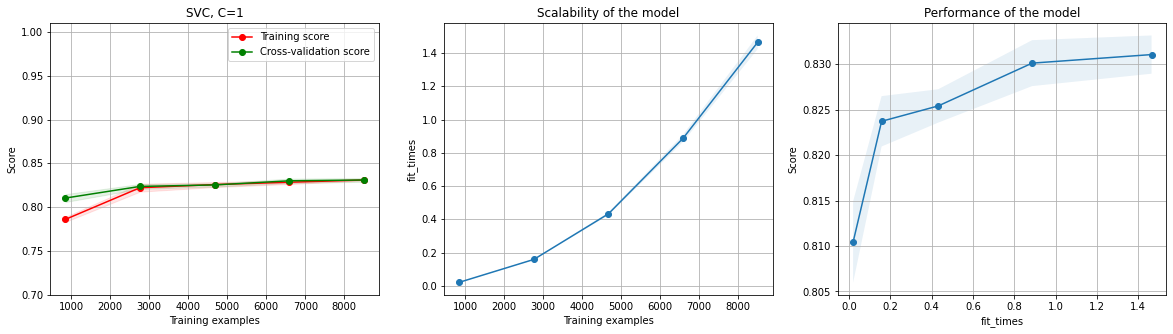

In [10]:
title = "SVC, C=1"
plot_learning_curve(
    svc_base, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=4
)

plt.show()

In [11]:
y_pred_svc_base_train = cross_val_predict(svc_base, X_train, y_train, cv=5)
y_pred_svc_base_test = cross_val_predict(svc_base, X_test, y_test, cv=5)

accuracy_train = accuracy_score(y_train, y_pred_svc_base_train)
precision_train = precision_score(y_train, y_pred_svc_base_train)
recall_train = recall_score(y_train, y_pred_svc_base_train)
f1_train = f1_score(y_train, y_pred_svc_base_train)
roc_auc_train = roc_auc_score(y_train, y_pred_svc_base_train)

accuracy_test = accuracy_score(y_test, y_pred_svc_base_test)
precision_test = precision_score(y_test, y_pred_svc_base_test)
recall_test = recall_score(y_test, y_pred_svc_base_test)
f1_test = f1_score(y_test, y_pred_svc_base_test)
roc_auc_test = roc_auc_score(y_test, y_pred_svc_base_test)

print(f"Train Accuracy of SVC, C=1: {accuracy_train:.3f}")
print(f"Train Precision of SVC, C=1: {precision_train:.3f}")
print(f"Train Recall of SVC, C=1: {recall_train:.3f}")
print(f"Train F1 of SVC, C=1: {f1_train:.3f}")
print(f"Train ROC AUC of SVC, C=1: {roc_auc_train:.3f}")

print("---")
print(f"Test Accuracy of SVC, C=1: {accuracy_test:.3f}")
print(f"Test Precision of SVC, C=1: {precision_test:.3f}")
print(f"Test Recall of SVC, C=1: {recall_test:.3f}")
print(f"Test F1 of SVC, C=1: {f1_test:.3f}")
print(f"Test ROC AUC of SVC, C=1: {roc_auc_test:.3f}")

Train Accuracy of SVC, C=1: 0.831
Train Precision of SVC, C=1: 0.764
Train Recall of SVC, C=1: 0.461
Train F1 of SVC, C=1: 0.575
Train ROC AUC of SVC, C=1: 0.707
---
Test Accuracy of SVC, C=1: 0.830
Test Precision of SVC, C=1: 0.792
Test Recall of SVC, C=1: 0.370
Test F1 of SVC, C=1: 0.504
Test ROC AUC of SVC, C=1: 0.670


Perform a hyperparameter tuning

In [12]:
# Try with different kernels and C (reg parameter)
kernels = ["linear", "poly", "rbf", "sigmoid"]
regs = [0.0001, 0.001, 0.01, 0.1, 1]

In [13]:
hp_scores = {}
for k in kernels:
    for c in regs:
        hp_scores[f"{k},{c}"] = {}
        print(f"Training for {k}, {c}")
        svc = SVC(kernel = k, C=c)
        svc.fit(X_train, y_train)
        y_pred_train = svc.predict(X_train)
        y_pred_test = svc.predict(X_test)

        train_acc = accuracy_score(y_train,y_pred_train)
        train_precision = precision_score(y_train, y_pred_train)
        train_recall = recall_score(y_train, y_pred_train)
        train_f1 = f1_score(y_train, y_pred_train)
        train_roc = roc_auc_score(y_train, y_pred_train)

        test_acc = accuracy_score(y_test,y_pred_test)
        test_precision = precision_score(y_test, y_pred_test)
        test_recall = recall_score(y_test, y_pred_test)
        test_f1 = f1_score(y_test, y_pred_test)
        test_roc = roc_auc_score(y_test, y_pred_test)
    
        hp_scores[f"{k},{c}"]["train_acc"] = train_acc
        hp_scores[f"{k},{c}"]["train_precision"] = train_precision
        hp_scores[f"{k},{c}"]["train_recall"] = train_recall
        hp_scores[f"{k},{c}"]["train_f1"] = train_f1
        hp_scores[f"{k},{c}"]["train_roc"] = train_roc

        hp_scores[f"{k},{c}"]["test_acc"] = test_acc
        hp_scores[f"{k},{c}"]["test_precision"] = test_precision
        hp_scores[f"{k},{c}"]["test_recall"] = test_recall
        hp_scores[f"{k},{c}"]["test_f1"] = test_f1
        hp_scores[f"{k},{c}"]["test_roc"] = test_roc

Training for linear, 0.0001
Training for linear, 0.001
Training for linear, 0.01
Training for linear, 0.1
Training for linear, 1
Training for poly, 0.0001


/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training for poly, 0.001


/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training for poly, 0.01
Training for poly, 0.1
Training for poly, 1
Training for rbf, 0.0001


/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training for rbf, 0.001


/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training for rbf, 0.01


/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training for rbf, 0.1
Training for rbf, 1
Training for sigmoid, 0.0001


/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training for sigmoid, 0.001


/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training for sigmoid, 0.01


/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edwin/.virtualenvs/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training for sigmoid, 0.1
Training for sigmoid, 1


In [14]:
hp_scores_df = pd.DataFrame(hp_scores)

In [15]:
hp_scores_df.idxmax(axis=1)

train_acc          linear,0.001
train_precision       poly,0.01
train_recall       linear,0.001
train_f1           linear,0.001
train_roc          linear,0.001
test_acc           linear,0.001
test_precision          rbf,0.1
test_recall        linear,0.001
test_f1            linear,0.001
test_roc           linear,0.001
dtype: object

In [16]:
lin_columns = [c for c in hp_scores_df.columns if c.startswith("linear,")]
poly_columns = [c for c in hp_scores_df.columns if c.startswith("poly,")]
rbf_columns = [c for c in hp_scores_df.columns if c.startswith("rbf,")]
sig_columns = [c for c in hp_scores_df.columns if c.startswith("sigmoid,")]

lin_roc_scores_test = hp_scores_df.loc["test_roc", lin_columns]
poly_roc_scores_test = hp_scores_df.loc["test_roc", poly_columns]
rbf_roc_scores_test = hp_scores_df.loc["test_roc", rbf_columns]
sig_roc_scores_test = hp_scores_df.loc["test_roc", sig_columns]

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

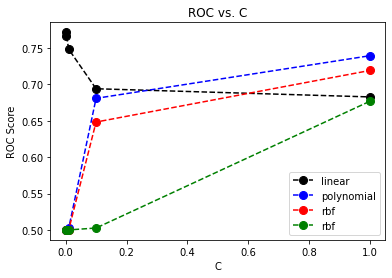

In [17]:
fig, ax = plt.subplots()

ax.plot(
    regs,
    lin_roc_scores_test,
    color='black', 
    linestyle='dashed', 
    marker='o',
    markerfacecolor='black', 
    markersize=8,
    label="linear"
)
ax.plot(
    regs,
    poly_roc_scores_test,
    color='blue', 
    linestyle='dashed', 
    marker='o',
    markerfacecolor='blue', 
    markersize=8,
    label="polynomial"
)
ax.plot(
    regs,
    rbf_roc_scores_test,
    color='red', 
    linestyle='dashed', 
    marker='o',
    markerfacecolor='red', 
    markersize=8,
    label="rbf"
)
ax.plot(
    regs,
    sig_roc_scores_test,
    color='green', 
    linestyle='dashed', 
    marker='o',
    markerfacecolor='green', 
    markersize=8,
    label="rbf"
)
plt.title('ROC vs. C')
plt.xlabel('C')
plt.ylabel('ROC Score')
plt.legend()
plt.xticks()

It seems that kernel=linear and C=0.001 provided the best scores. We will train the model again with these settings

Advanced model

In [18]:
t.start()
svc_adv = SVC(C=0.001, kernel="linear")
svc_adv.fit(X_train, y_train)
y_pred_svc_adv_train = svc_adv.predict(X_train)
y_pred_svc_adv_test = svc_adv.predict(X_test)
t.stop()

accuracy_train = accuracy_score(y_train, y_pred_svc_adv_train)
precision_train = precision_score(y_train, y_pred_svc_adv_train)
recall_train = recall_score(y_train, y_pred_svc_adv_train)
f1_train = f1_score(y_train, y_pred_svc_adv_train)
roc_auc_train = roc_auc_score(y_train, y_pred_svc_adv_train)

accuracy_test = accuracy_score(y_test, y_pred_svc_adv_test)
precision_test = precision_score(y_test, y_pred_svc_adv_test)
recall_test = recall_score(y_test, y_pred_svc_adv_test)
f1_test = f1_score(y_test, y_pred_svc_adv_test)
roc_auc_test = roc_auc_score(y_test, y_pred_svc_adv_test)

print(f"Train Accuracy of SVC, kernel=linear, C=0.001: {accuracy_train:.3f}")
print(f"Train Precision of SVC, kernel=linear, C=0.001: {precision_train:.3f}")
print(f"Train Recall of SVC, kernel=linear, C=0.001: {recall_train:.3f}")
print(f"Train F1 of SVC, kernel=linear, C=0.001: {f1_train:.3f}")
print(f"Train ROC AUC of SVC, kernel=linear, C=0.001: {roc_auc_train:.3f}")

print("---")
print(f"Test Accuracy of SVC, kernel=linear, C=0.001: {accuracy_test:.3f}")
print(f"Test Precision of SVC, kernel=linear, C=0.001: {precision_test:.3f}")
print(f"Test Recall of SVC, kernel=linear, C=0.001: {recall_test:.3f}")
print(f"Test F1 of SVC, kernel=linear, C=0.001: {f1_test:.3f}")
print(f"Test ROC AUC of SVC, kernel=linear, C=0.001: {roc_auc_test:.3f}")


Elapsed time: 6.0739 seconds
Train Accuracy of SVC, kernel=linear, C=0.001: 0.857
Train Precision of SVC, kernel=linear, C=0.001: 0.763
Train Recall of SVC, kernel=linear, C=0.001: 0.615
Train F1 of SVC, kernel=linear, C=0.001: 0.681
Train ROC AUC of SVC, kernel=linear, C=0.001: 0.776
---
Test Accuracy of SVC, kernel=linear, C=0.001: 0.861
Test Precision of SVC, kernel=linear, C=0.001: 0.751
Test Recall of SVC, kernel=linear, C=0.001: 0.605
Test F1 of SVC, kernel=linear, C=0.001: 0.670
Test ROC AUC of SVC, kernel=linear, C=0.001: 0.772


In [19]:
from sklearn.model_selection import cross_validate,cross_val_predict

t.start()
svc_base_res_adv = cross_validate(
      estimator=svc_adv,
      X=X_train,
      y=y_train,
      cv=5,
      scoring=['accuracy', 'precision', 'recall', 'f1'],
      return_train_score=True
      )
t.stop()

Elapsed time: 16.3796 seconds


In [20]:
for m in training_metrics:
    print(f"{m}: {np.mean(svc_base_res_adv[m]):.3f}")
print("----")
for m in testing_metrics:
    print(f"{m}: {np.mean(svc_base_res_adv[m]):.3f}")

train_accuracy: 0.857
train_precision: 0.764
train_recall: 0.613
train_f1: 0.680
----
test_accuracy: 0.856
test_precision: 0.761
test_recall: 0.613
test_f1: 0.679


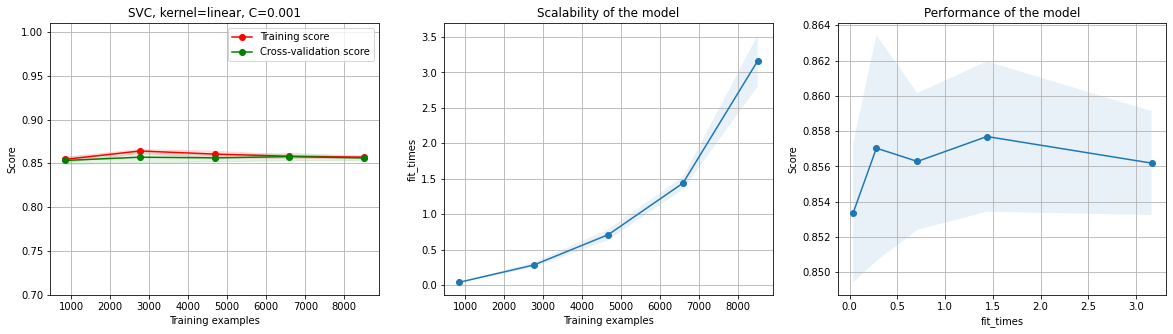

In [21]:
title = "SVC, kernel=linear, C=0.001"
plot_learning_curve(
    svc_adv, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=4
)

plt.show()

In [22]:
y_pred_svc_adv_train = cross_val_predict(svc_adv, X_train, y_train, cv=5)
y_pred_svc_adv_test = cross_val_predict(svc_adv, X_test, y_test, cv=5)

accuracy_train = accuracy_score(y_train, y_pred_svc_adv_train)
precision_train = precision_score(y_train, y_pred_svc_adv_train)
recall_train = recall_score(y_train, y_pred_svc_adv_train)
f1_train = f1_score(y_train, y_pred_svc_adv_train)
roc_auc_train = roc_auc_score(y_train, y_pred_svc_adv_train)

accuracy_test = accuracy_score(y_test, y_pred_svc_adv_test)
precision_test = precision_score(y_test, y_pred_svc_adv_test)
recall_test = recall_score(y_test, y_pred_svc_adv_test)
f1_test = f1_score(y_test, y_pred_svc_adv_test)
roc_auc_test = roc_auc_score(y_test, y_pred_svc_adv_test)

print(f"Train Accuracy of SVC, kernel=linear, C=0.001: {accuracy_train:.3f}")
print(f"Train Precision of SVC, kernel=linear, C=0.001: {precision_train:.3f}")
print(f"Train Recall of SVC, kernel=linear, C=0.001: {recall_train:.3f}")
print(f"Train F1 of SVC, kernel=linear, C=0.001: {f1_train:.3f}")
print(f"Train ROC AUC of SVC, kernel=linear, C=0.001: {roc_auc_train:.3f}")

print("---")
print(f"Test Accuracy of SVC, kernel=linear, C=0.001: {accuracy_test:.3f}")
print(f"Test Precision of SVC, kernel=linear, C=0.001: {precision_test:.3f}")
print(f"Test Recall of SVC, kernel=linear, C=0.001: {recall_test:.3f}")
print(f"Test F1 of SVC, kernel=linear, C=0.001: {f1_test:.3f}")
print(f"Test ROC AUC of SVC, kernel=linear, C=0.001: {roc_auc_test:.3f}")

Train Accuracy of SVC, kernel=linear, C=0.001: 0.856
Train Precision of SVC, kernel=linear, C=0.001: 0.761
Train Recall of SVC, kernel=linear, C=0.001: 0.613
Train F1 of SVC, kernel=linear, C=0.001: 0.679
Train ROC AUC of SVC, kernel=linear, C=0.001: 0.775
---
Test Accuracy of SVC, kernel=linear, C=0.001: 0.861
Test Precision of SVC, kernel=linear, C=0.001: 0.762
Test Recall of SVC, kernel=linear, C=0.001: 0.589
Test F1 of SVC, kernel=linear, C=0.001: 0.664
Test ROC AUC of SVC, kernel=linear, C=0.001: 0.766


In [23]:
y_pred_base_svc_train_f = svc_base.predict(X_train)
y_pred_adv_svc_train_f = svc_adv.predict(X_train)

accuracy_base_train = accuracy_score(y_train, y_pred_base_svc_train_f)
precision_base_train = precision_score(y_train, y_pred_base_svc_train_f)
recall_base_train = recall_score(y_train, y_pred_base_svc_train_f)
f1_base_train = f1_score(y_train, y_pred_base_svc_train_f)
roc_base_train = roc_auc_score(y_train, y_pred_base_svc_train_f)

accuracy_adv_train = accuracy_score(y_train, y_pred_adv_svc_train_f)
precision_adv_train = precision_score(y_train, y_pred_adv_svc_train_f)
recall_adv_train = recall_score(y_train, y_pred_adv_svc_train_f)
f1_adv_train = f1_score(y_train, y_pred_adv_svc_train_f)
roc_adv_train = roc_auc_score(y_train, y_pred_adv_svc_train_f)

y_pred_base_svc_test_f = svc_base.predict(X_test)
y_pred_adv_svc_test_f = svc_adv.predict(X_test)

accuracy_base_test = accuracy_score(y_test, y_pred_base_svc_test_f)
precision_base_test = precision_score(y_test, y_pred_base_svc_test_f)
recall_base_test = recall_score(y_test, y_pred_base_svc_test_f)
f1_base_test = f1_score(y_test, y_pred_base_svc_test_f)
roc_base_test = roc_auc_score(y_test, y_pred_base_svc_test_f)

accuracy_adv_test = accuracy_score(y_test, y_pred_adv_svc_test_f)
precision_adv_test = precision_score(y_test, y_pred_adv_svc_test_f)
recall_adv_test = recall_score(y_test, y_pred_adv_svc_test_f)
f1_adv_test = f1_score(y_test, y_pred_adv_svc_test_f)
roc_adv_test = roc_auc_score(y_test, y_pred_adv_svc_test_f)

In [24]:
print("Final - Training Set Performance")
print(f"Train Accuracy of Base SVC: {accuracy_base_train:.3f}")
print(f"Train Precision of Base SVC: {precision_base_train:.3f}")
print(f"Train Recall of Base SVC: {recall_base_train:.3f}")
print(f"Train F1 of Base SVC: {f1_base_train:.3f}")
print(f"Train ROC of Base SVC: {roc_base_train:.3f}")
print("-")
print(f"Train Accuracy of Adv SVC: {accuracy_adv_train:.3f}")
print(f"Train Precision of Adv SVC: {precision_adv_train:.3f}")
print(f"Train Recall of Adv SVC: {recall_adv_train:.3f}")
print(f"Train F1 of Adv SVC: {f1_adv_train:.3f}")
print(f"Train ROC of Adv SVC: {roc_adv_train:.3f}")

print("---")

print(f"Test Accuracy of Base SVC: {accuracy_base_test:.3f}")
print(f"Test Precision of Base SVC: {precision_base_test:.3f}")
print(f"Test Recall of Base SVC: {recall_base_test:.3f}")
print(f"Test F1 of Base SVC: {f1_base_test:.3f}")
print(f"Test ROC of Base SVC: {roc_base_test:.3f}")
print("-")
print(f"Test Accuracy of Adv SVC: {accuracy_adv_test:.3f}")
print(f"Test Precision of Adv SVC: {precision_adv_test:.3f}")
print(f"Test Recall of Adv SVC: {recall_adv_test:.3f}")
print(f"Test F1 of Adv SVC: {f1_adv_test:.3f}")
print(f"Test ROC of Adv SVC: {roc_adv_test:.3f}")

Final - Training Set Performance
Train Accuracy of Base SVC: 0.833
Train Precision of Base SVC: 0.763
Train Recall of Base SVC: 0.475
Train F1 of Base SVC: 0.585
Train ROC of Base SVC: 0.713
-
Train Accuracy of Adv SVC: 0.857
Train Precision of Adv SVC: 0.763
Train Recall of Adv SVC: 0.615
Train F1 of Adv SVC: 0.681
Train ROC of Adv SVC: 0.776
---
Test Accuracy of Base SVC: 0.846
Test Precision of Base SVC: 0.773
Test Recall of Base SVC: 0.482
Test F1 of Base SVC: 0.594
Test ROC of Base SVC: 0.719
-
Test Accuracy of Adv SVC: 0.861
Test Precision of Adv SVC: 0.751
Test Recall of Adv SVC: 0.605
Test F1 of Adv SVC: 0.670
Test ROC of Adv SVC: 0.772


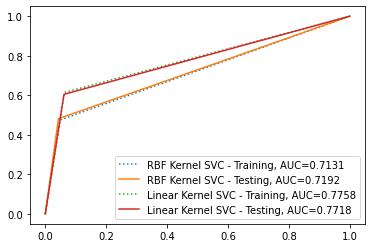

In [25]:
plt.figure(0).clf()

# Basic
fpr, tpr, _ = roc_curve(y_train, y_pred_base_svc_train_f)
auc = round(roc_auc_score(y_train, y_pred_base_svc_train_f), 4)
plt.plot(fpr,tpr,label="RBF Kernel SVC - Training, AUC="+str(auc), linestyle="dotted")

fpr, tpr, _ = roc_curve(y_test, y_pred_base_svc_test_f)
auc = round(roc_auc_score(y_test, y_pred_base_svc_test_f), 4)
plt.plot(fpr,tpr,label="RBF Kernel SVC - Testing, AUC="+str(auc), linestyle="solid")

# ADV

fpr, tpr, _ = roc_curve(y_train, y_pred_adv_svc_train_f)
auc = round(roc_auc_score(y_train, y_pred_adv_svc_train_f), 4)
plt.plot(fpr,tpr,label=f"Linear Kernel SVC - Training, AUC="+str(auc), linestyle="dotted")
plt.legend()

fpr, tpr, _ = roc_curve(y_test, y_pred_adv_svc_test_f)
auc = round(roc_auc_score(y_test, y_pred_adv_svc_test_f), 4)
plt.plot(fpr,tpr,label=f"Linear Kernel SVC - Testing, AUC="+str(auc), linestyle="solid")
plt.legend()